# Series

## Data import


In [1]:
import pandas as pd

url = "https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip"

df = pd.read_csv(url, dtype_backend="pyarrow", engine="pyarrow")
city_mpg = df.city08

highway_mpg = df.highway08

In [ ]:
# You can use the `+` operator to add two Series together.
print((city_mpg + highway_mpg) / 2)

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: double[pyarrow]


In [ ]:
# You can use the `quantile` method to get specific quantiles of a Series.
city_mpg.quantile([0.1, 0.5, 0.9])

0.1    13.0
0.5    17.0
0.9    24.0
Name: city08, dtype: double[pyarrow]

In [4]:
city_mpg.gt(20).astype("int64[pyarrow]").mul(100).mean()

24.965973167412017

In [5]:
city_mpg.gt(20).sum()

10272

In [ ]:
city_mpg.agg("mean")

18.369045304297103

In [ ]:
make = df.make
# print(make)
# print(make.value_counts())

cat_make = make.astype("category")
print(cat_make)
print(cat_make.value_counts())


0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: category
Categories (136, string[pyarrow]): [AM General, ASC Incorporated, Acura, Alfa Romeo, ..., Volvo, Wallace Environmental, Yugo, smart]
make
Chevrolet                             4003
Ford                                  3371
Dodge                                 2583
GMC                                   2494
Toyota                                2071
                                      ... 
S and S Coach Company  E.p. Dutton       1
Shelby                                   1
Superior Coaches Div E.p. Dutton         1
Volga Associated Automobile              1
Vixen Motor Company                      1
Name: count, Length: 136, dtype: int64


In [2]:
url = "https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv"
df = pd.read_csv(url, index_col=0, dtype_backend="pyarrow")
df

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,12,8,11,9,9,10,5,6,9,8
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,29,29,15,17,18,21,15,14,18,18
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,6,16,30,25,25,17,23,20,19,19
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,...,16,23,25,31,26,29,27,24,28,25
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,36,37,42,41,40,42,44,37,39,39
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,41,40,38,34,36,36,26,32,36,37


In [3]:
df.dtypes

Seq.         string[pyarrow]
President    string[pyarrow]
Party        string[pyarrow]
Bg            int64[pyarrow]
Im            int64[pyarrow]
Int           int64[pyarrow]
IQ            int64[pyarrow]
L             int64[pyarrow]
WR            int64[pyarrow]
AC            int64[pyarrow]
EAb           int64[pyarrow]
LA            int64[pyarrow]
CAb           int64[pyarrow]
OA            int64[pyarrow]
PL            int64[pyarrow]
RC            int64[pyarrow]
CAp           int64[pyarrow]
HE            int64[pyarrow]
EAp           int64[pyarrow]
DA            int64[pyarrow]
FPA           int64[pyarrow]
AM            int64[pyarrow]
EV            int64[pyarrow]
O             int64[pyarrow]
dtype: object

In [4]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes("int64")
        return df_.astype({col: "uint8[pyarrow]" for col in cols})

    return (
        df.rename(columns={"Seq.": "Seq"})  # 1
        .rename(
            columns={
                k: v.replace(" ", "_")
                for k, v in {
                    "Bg": "Background",
                    "PL": "Party leadership",
                    "CAb": "Communication ability",
                    "RC": "Relations with Congress",
                    "CAp": "Court appointments",
                    "HE": "Handling of economy",
                    "L": "Luck",
                    "AC": "Ability to compromise",
                    "WR": "Willing to take risks",
                    "EAp": "Executive appointments",
                    "OA": "Overall ability",
                    "Im": "Imagination",
                    "DA": "Domestic accomplishments",
                    "Int": "Integrity",
                    "EAb": "Executive ability",
                    "FPA": "Foreign policy accomplishments",
                    "LA": "Leadership ability",
                    "IQ": "Intelligence",
                    "AM": "Avoid crucial mistakes",
                    "EV": "Experts' view",
                    "O": "Overall",
                }.items()
            }
        )
        .astype({"Party": "category"})  # 2
        .pipe(int64_to_uint8)  # 3
        .assign(
            Average_rank=lambda df_: (
                df_.select_dtypes("uint8")  # 4
                .sum(axis=1)
                .rank(method="dense")
                .astype("uint8[pyarrow]")
            ),
            Quartile=lambda df_: pd.qcut(
                df_.Average_rank, 4, labels="1st 2nd 3rd 4th".split()
            ),
        )
    )

Text(0.5, 1.0, 'Presidential Ranking')

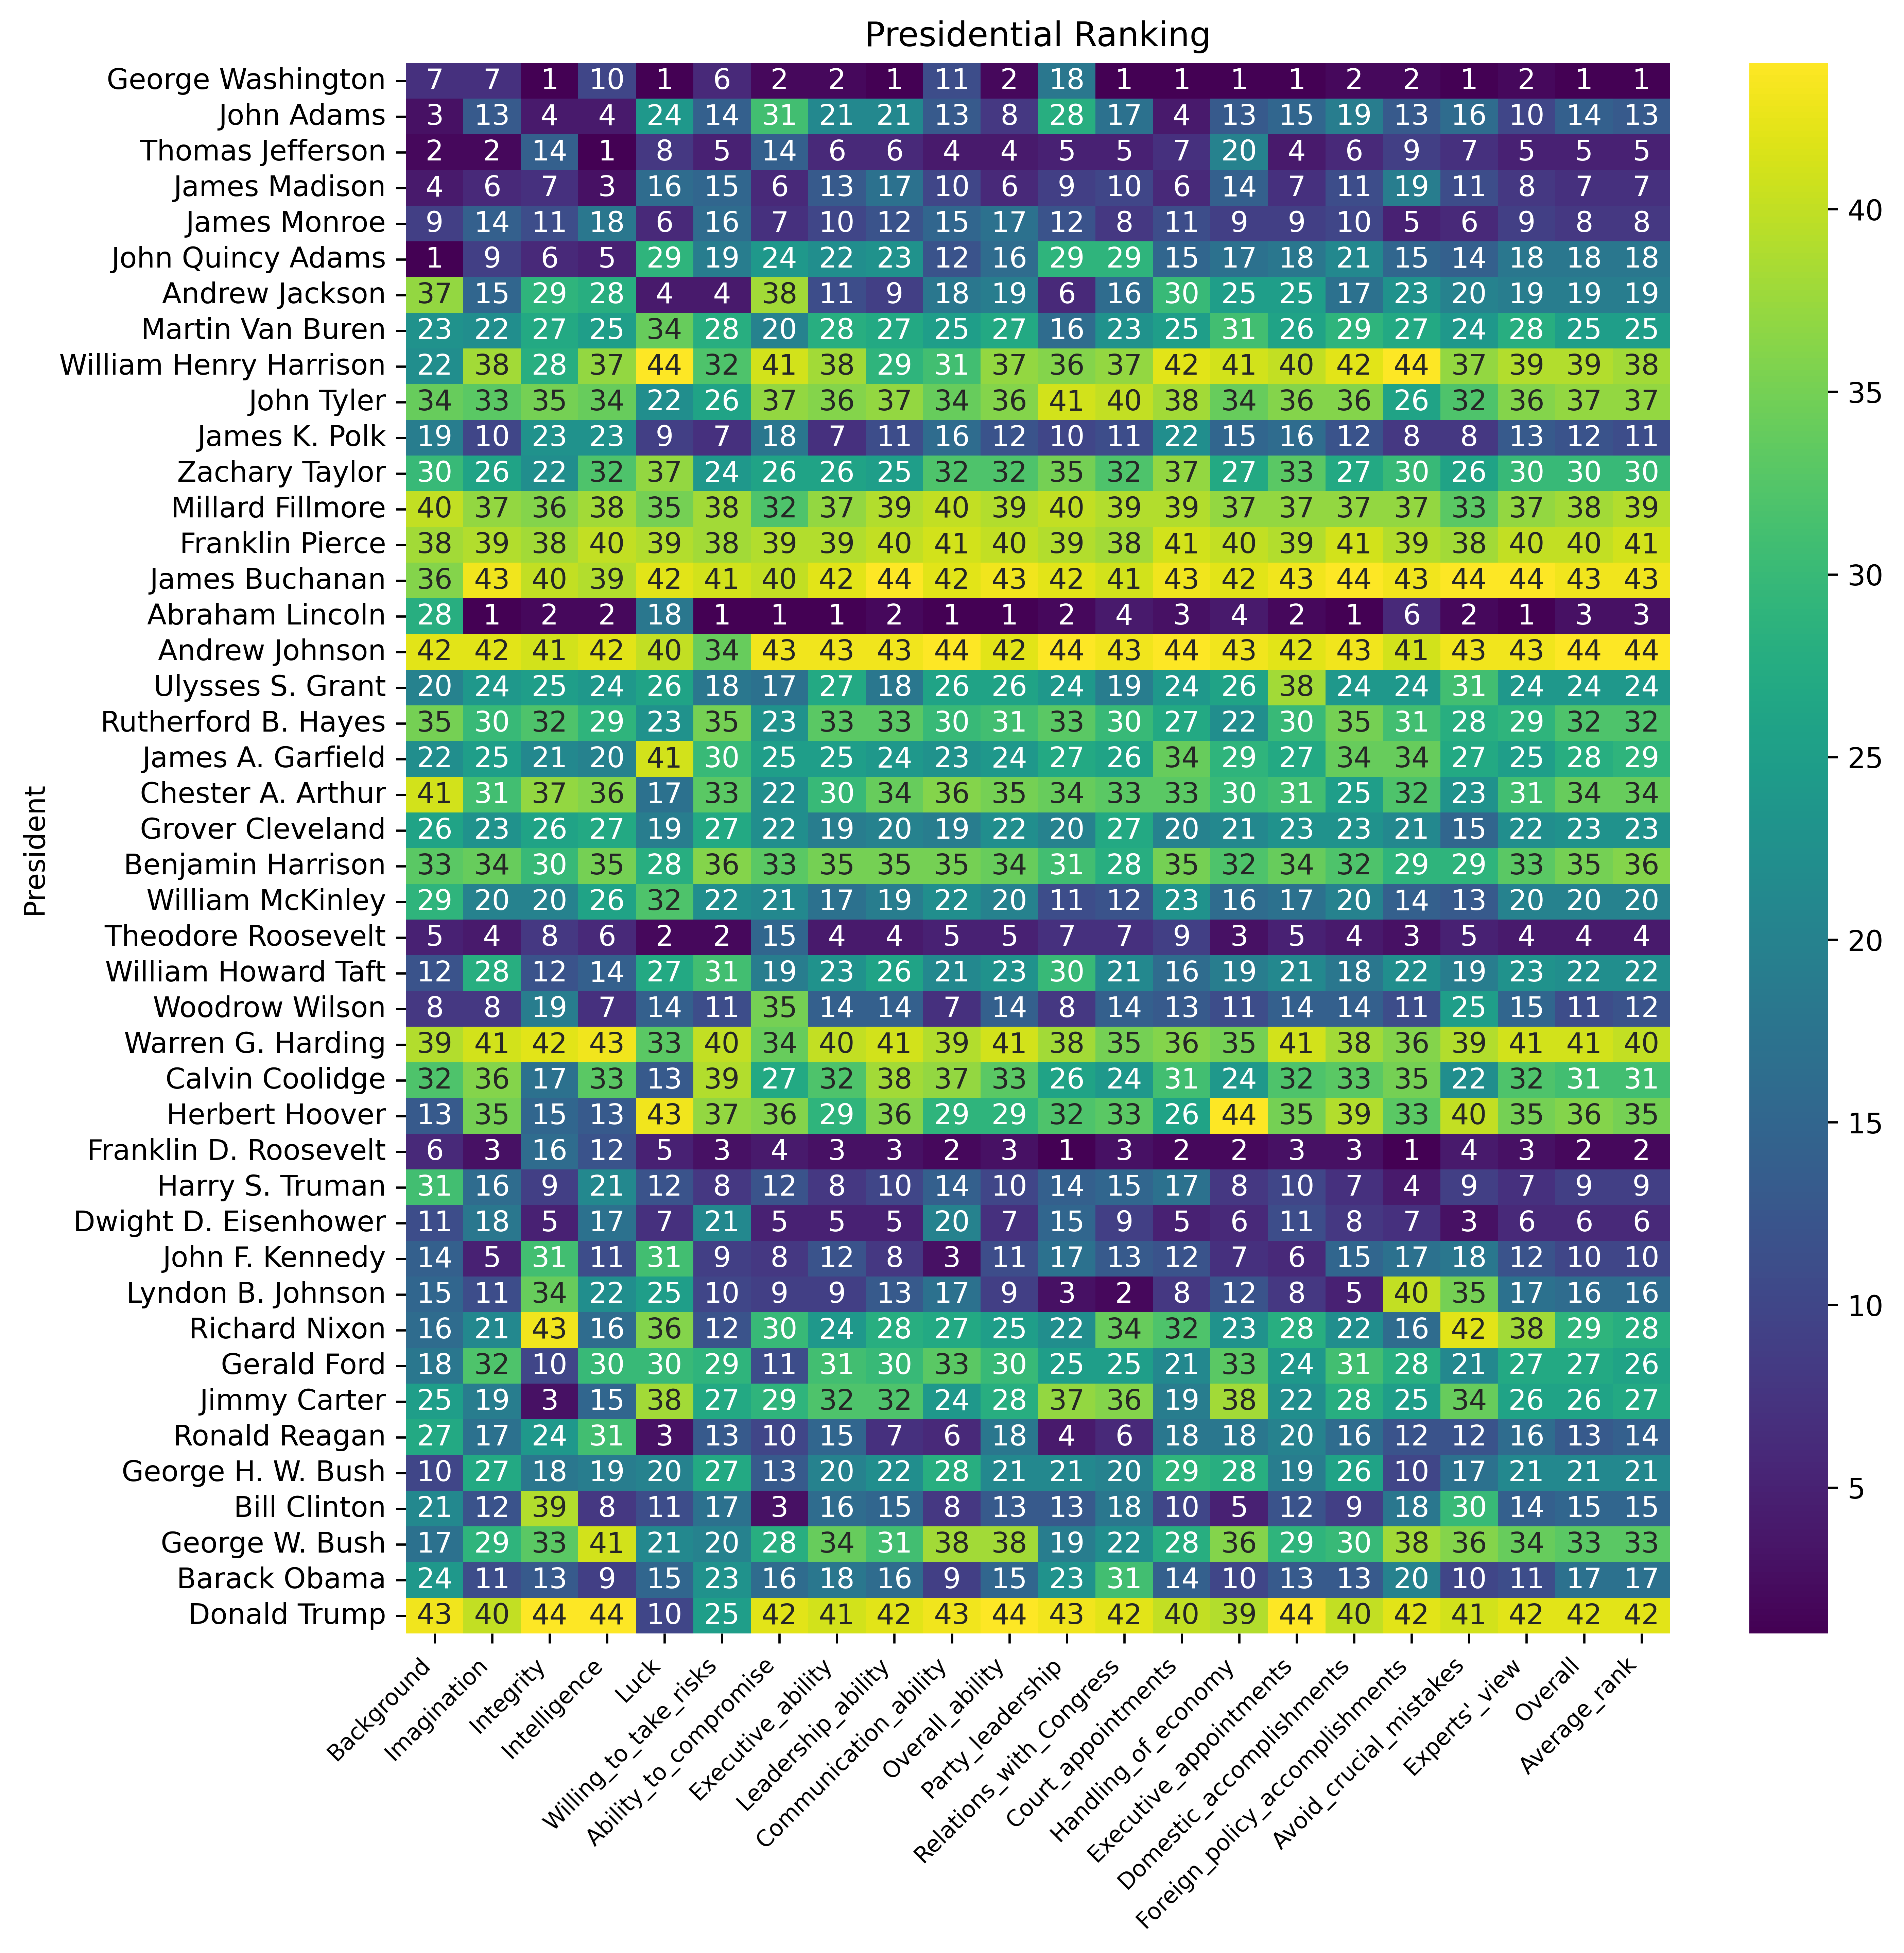

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10), dpi=600)
g = sns.heatmap(
    tweak_siena_pres(df)
    .set_index("President")
    .loc[:, "Background":"Average_rank"]
    .astype("uint8"),
    annot=True,
    cmap="viridis",
    ax=ax,
)
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=8, ha="right")
plt.title("Presidential Ranking")